In [1]:
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from random import randint
import seaborn as sns
import statistics
import numpy as np

Информация взята тут: <https://studbooks.net/1104519/agropromyshlennost/metody_ucheta_rasprostranyonnosti_razvitiya_bolezney>

<https://www.pesticidy.ru/%D0%9F%D0%B0%D1%80%D1%88%D0%B0_%D1%8F%D0%B1%D0%BB%D0%BE%D0%BD%D0%B8>

На основе данных выведена скорость прорастания спор в процентном соотношении

Споры прорастают только при влажности выше 70% и температуре от 0°C до 30°C.

Функция, которая лежит в основе алгоритма: 
$$
f(t)= \left\{ 
\begin{array}{c}
t * {100\over 19} * {24\over 500}, & t ∈ (0;19] \\ 
(-t*{3000\over 330} + {3000\over 11}) * {24\over 500}, & t ∈ (19;30) \\
прошлое значение, & t ∈ (-\infty; 0] ⋃ [30; +\infty)
\end{array}
\right.
$$ 

t - среднесуточная температура за сегодня

Функция выдает -1 когда никто не размножается

In [2]:
hum = [81.38, 54.13, 57.5, 49.75, 58.38, 55.88, 53.13, 55.25, 
            48.63, 45, 63, 51.25, 41.63, 55.63, 57, 51.25, 50.63,
            54.63, 61, 63.63, 73.38, 83, 81.25, 72, 88.25, 65.75,
            47.88, 65.75, 50.5, 49.75, 82.75, 60.88, 65.5, 87.13,
            58.63, 68.5, 56.25, 57.5, 59.38, 57.38, 48.38, 43.75,
            42.75, 46.13, 45.88, 46.75, 48.75, 47.25, 41.88, 41.5,
            53.38, 53.13, 52.63, 83.75, 83.5, 62.13, 61.75, 54.38,
            65.88, 84.88, 88.38, 68.25, 65.13, 57.25, 51.13, 64.25,
            61.13, 75.25, 75.38, 58.25, 74.5, 76.63, 75.38, 88.63,
            87.38, 87.25, 74.88, 65.25, 81.88, 78.5, 68.63, 64, 62.25,
            77.38, 87.88, 80.75, 90, 78.38, 92.88, 90.88, 72.88, 69.5]
len(hum)

92

In [3]:
temp = [7, 15.5, 13.5, 15.5, 10.5, 6.8, 8.5, 11.5,
        15, 16.5, 17, 20.5, 22.5, 17, 20, 20, 22.5, 24.5, 
        16.5, 15, 16, 15.5, 15.5, 21.5, 21, 24, 21.5, 15.5, 
        21.5, 22, 9, 22, 21.5, 6, 15.5, 17.5, 18, 22, 23, 24, 
        16.5, 17.5, 19.5, 22, 25, 27.5, 28, 28, 25, 23.5, 23, 
        22, 27, 17, 17.5, 22.5, 24, 22, 17, 21.5, 20, 25.5, 23,
        24.5, 27.5, 23.5, 23.5, 25, 17.5, 15, 16, 16.5, 14.5, 
        15.5, 23.5, 28, 27.5, 19, 21, 21, 22.5, 18.5, 14, 24,
        25, 24.5, 25.5, 14.5, 23.5, 27, 28, 29]


In [4]:
times = pd.date_range('2023-05-01', end = '2023-07-31', freq = 'D')

In [5]:
times

DatetimeIndex(['2023-05-01', '2023-05-02', '2023-05-03', '2023-05-04',
               '2023-05-05', '2023-05-06', '2023-05-07', '2023-05-08',
               '2023-05-09', '2023-05-10', '2023-05-11', '2023-05-12',
               '2023-05-13', '2023-05-14', '2023-05-15', '2023-05-16',
               '2023-05-17', '2023-05-18', '2023-05-19', '2023-05-20',
               '2023-05-21', '2023-05-22', '2023-05-23', '2023-05-24',
               '2023-05-25', '2023-05-26', '2023-05-27', '2023-05-28',
               '2023-05-29', '2023-05-30', '2023-05-31', '2023-06-01',
               '2023-06-02', '2023-06-03', '2023-06-04', '2023-06-05',
               '2023-06-06', '2023-06-07', '2023-06-08', '2023-06-09',
               '2023-06-10', '2023-06-11', '2023-06-12', '2023-06-13',
               '2023-06-14', '2023-06-15', '2023-06-16', '2023-06-17',
               '2023-06-18', '2023-06-19', '2023-06-20', '2023-06-21',
               '2023-06-22', '2023-06-23', '2023-06-24', '2023-06-25',
      

In [6]:
type(times)

pandas.core.indexes.datetimes.DatetimeIndex

In [7]:
len(times), len(temp), len(hum)

(92, 92, 92)

In [8]:
#def time_to_grow(hum,temp):
percent_growth = []
index = 0
for i in range(len(temp)):
    if 70 < hum[i] < 90 and 0 < temp[i] <= 19: # если условие выполняется, то зависимость линейна от температуры
        index = index + temp[i] * 100/19 * 24/500
        percent_growth.append(round(index,2))
    else: 
        if 70 < hum[i] < 90 and 19 < temp[i] < 30:
            index = index + (-temp[i] * 3000/330 + 3000/11) * 24/500
            percent_growth.append(round(index,2))
        else:
            if hum[i] < 70 or -3 < temp[i] <= 0 or 30 <= temp[i] < 32: 
                #index = index1
                percent_growth.append(round(index,2))
            else:
                if hum[i] >= 90 or temp[i] <= -3 or  temp[i] >= 32: 
                    index = 0
                    percent_growth.append(0)
#return percent_growth

In [9]:
percent_growth

[1.77,
 1.77,
 1.77,
 1.77,
 1.77,
 1.77,
 1.77,
 1.77,
 1.77,
 1.77,
 1.77,
 1.77,
 1.77,
 1.77,
 1.77,
 1.77,
 1.77,
 1.77,
 1.77,
 1.77,
 5.81,
 9.73,
 13.64,
 17.35,
 21.28,
 21.28,
 21.28,
 21.28,
 21.28,
 21.28,
 23.55,
 23.55,
 23.55,
 25.07,
 25.07,
 25.07,
 25.07,
 25.07,
 25.07,
 25.07,
 25.07,
 25.07,
 25.07,
 25.07,
 25.07,
 25.07,
 25.07,
 25.07,
 25.07,
 25.07,
 25.07,
 25.07,
 25.07,
 29.36,
 33.78,
 33.78,
 33.78,
 33.78,
 33.78,
 37.49,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 44.04,
 48.46,
 48.46,
 52.5,
 56.67,
 60.33,
 64.25,
 67.09,
 67.96,
 69.05,
 69.05,
 72.98,
 76.9,
 76.9,
 76.9,
 76.9,
 79.52,
 81.7,
 84.1,
 0,
 3.66,
 0,
 0,
 0.87,
 0.87]

In [10]:
df_test = pd.DataFrame(data = np.array([times, temp, hum,]).T, columns=['times', 'temp', 'hum'])

In [11]:
df_test['times'] = ['2023-05-01', '2023-05-02', '2023-05-03', '2023-05-04',
               '2023-05-05', '2023-05-06', '2023-05-07', '2023-05-08',
               '2023-05-09', '2023-05-10', '2023-05-11', '2023-05-12',
               '2023-05-13', '2023-05-14', '2023-05-15', '2023-05-16',
               '2023-05-17', '2023-05-18', '2023-05-19', '2023-05-20',
               '2023-05-21', '2023-05-22', '2023-05-23', '2023-05-24',
               '2023-05-25', '2023-05-26', '2023-05-27', '2023-05-28',
               '2023-05-29', '2023-05-30', '2023-05-31', '2023-06-01',
               '2023-06-02', '2023-06-03', '2023-06-04', '2023-06-05',
               '2023-06-06', '2023-06-07', '2023-06-08', '2023-06-09',
               '2023-06-10', '2023-06-11', '2023-06-12', '2023-06-13',
               '2023-06-14', '2023-06-15', '2023-06-16', '2023-06-17',
               '2023-06-18', '2023-06-19', '2023-06-20', '2023-06-21',
               '2023-06-22', '2023-06-23', '2023-06-24', '2023-06-25',
               '2023-06-26', '2023-06-27', '2023-06-28', '2023-06-29',
               '2023-06-30', '2023-07-01', '2023-07-02', '2023-07-03',
               '2023-07-04', '2023-07-05', '2023-07-06', '2023-07-07',
               '2023-07-08', '2023-07-09', '2023-07-10', '2023-07-11',
               '2023-07-12', '2023-07-13', '2023-07-14', '2023-07-15',
               '2023-07-16', '2023-07-17', '2023-07-18', '2023-07-19',
               '2023-07-20', '2023-07-21', '2023-07-22', '2023-07-23',
               '2023-07-24', '2023-07-25', '2023-07-26', '2023-07-27',
               '2023-07-28', '2023-07-29', '2023-07-30', '2023-07-31']

In [13]:
#percent_growth.append(1)

In [12]:
len(times), len(temp), len(hum),len(percent_growth)

(92, 92, 92, 92)

In [13]:
df_test['percent_growth'] = percent_growth

In [14]:
df_test

,times,temp,hum,percent_growth
0,2023-05-01,7,81.38,1.77
1,2023-05-02,15.5,54.13,1.77
2,2023-05-03,13.5,57.5,1.77
3,2023-05-04,15.5,49.75,1.77
4,2023-05-05,10.5,58.38,1.77
...,...,...,...,...
87,2023-07-27,14.5,78.38,3.66
88,2023-07-28,23.5,92.88,0.00
89,2023-07-29,27,90.88,0.00
90,2023-07-30,28,72.88,0.87


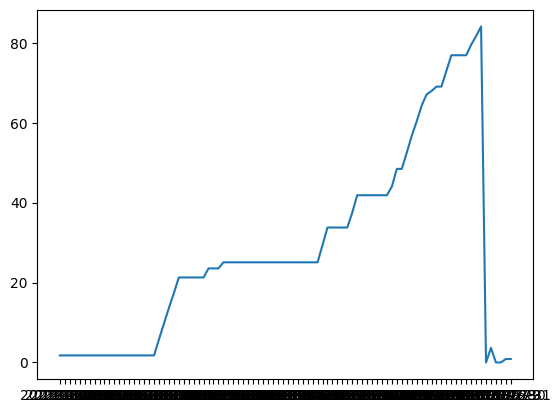

In [15]:
plt.plot(df_test['times'], df_test['percent_growth'], linestyle='-')
plt.show()


Информация взята тут: <http://berrylib.ru/books/item/f00/s00/z0000040/st004.shtml>

На основе данных выведена функция описывающая зависимость длины инкубационного периода от температуры

Входными данными является список из среднесуточных температур, снятых с датчика.
```
temp = []
for i in range(20):
    temp.append(randint(-30, 30))
```
 - симмуляция списка среднесуточных температур.

 `mean = (temp[-1]+temp[-2]+temp[-3]+temp[-4]+temp[-5]) / 5` - находим среднее значение тмпературы за последние 5 дней.

Условия для работоспособности зависисмости:    $$0 > mean > 25$$  (mean - средняя температура за последние 5 дней)

Функция зависимости:  

 $$
f(m)= \left\{ 
\begin{array}{c}
|24 - m| * {2\over 3} + 6, & m ∈ (0;25] \\ 
-1, & m ∈ (-\infty; 0] ⋃ (25; +\infty)
\end{array}
\right.
$$

m - mean -  средняя температура за последние 5 дней.

In [ ]:
temp = []
for i in range(20):
    temp.append(randint(-30, 30))
def parshas_incubation_period(temp):
    #mean = (temp[-1]+temp[-2]+temp[-3]+temp[-4]+temp[-5]) / 5
#    if mean > 0 and mean <= 25:
#        len_incubation_period = abs((24-mean)*2 / 3) + 6
#        return len_incubation_period
#    else: 
#        return -1
    if temp > 0 and temp <= 25:
        len_incubation_period = abs((24-temp)*2 / 3) + 6
        return len_incubation_period
    else: 
        return -1

In [22]:
humidity = [81.38, 54.13, 57.5, 49.75, 58.38, 55.88, 53.13, 55.25, 
            48.63, 45, 63, 51.25, 41.63, 55.63, 57, 51.25, 50.63,
            54.63, 61, 63.63, 73.38, 83, 81.25, 72, 88.25, 65.75,
            47.88, 65.75, 50.5, 49.75, 82.75, 60.88, 65.5, 87.13,
            58.63, 68.5, 56.25, 57.5, 59.38, 57.38, 48.38, 43.75,
            42.75, 46.13, 45.88, 46.75, 48.75, 47.25, 41.88, 41.5,
            53.38, 53.13, 52.63, 83.75, 83.5, 62.13, 61.75, 54.38,
            65.88, 84.88, 88.38, 68.25, 65.13, 57.25, 51.13, 64.25,
            61.13, 75.25, 75.38, 58.25, 74.5, 76.63, 75.38, 88.63,
            87.38, 87.25, 74.88, 65.25, 81.88, 78.5, 68.63, 64, 62.25,
            77.38, 87.88, 80.75, 90, 78.38, 92.88, 90.88, 72.88, 69.5]


In [ ]:
temp = [7, 15.5, 13.5, 15.5, 10.5, 6.8, 8.5, 11.5,
        15, 16.5, 17, 20.5, 22.5, 17, 20, 20, 22.5, 24.5, 
        16.5, 15, 16, 15.5, 15.5, 21.5, 21, 24, 21.5, 15.5, 
        21.5, 22, 9, 22, 21.5, 6, 15.5, 17.5, 18, 22, 23, 24, 
        16.5, 17.5, 19.5, 22, 25, 27.5, 28, 28, 25, 23.5, 23, 
        22, 27, 17, 17.5, 22.5, 24, 22, 17, 21.5, 20, 25.5, 23,
        24.5, 27.5, 23.5, 23.5, 25, 17.5, 15, 16, 16.5, 14.5, 
        15.5, 23.5, 28, 27.5, 19, 21, 21, 22.5, 18.5, 14, 24,
        25, 24.5, 25.5, 14.5, 23.5, 27]

incubation_time = []
for i in range(len(temp)):    
    percent = round(parshas_incubation_period(temp[i]),2)
    incubation_time.append(percent)
incubation_time

[17.33,
 11.67,
 13.0,
 11.67,
 15.0,
 17.47,
 16.33,
 14.33,
 12.0,
 11.0,
 10.67,
 8.33,
 7.0,
 10.67,
 8.67,
 8.67,
 7.0,
 6.33,
 11.0,
 12.0,
 11.33,
 11.67,
 11.67,
 7.67,
 8.0,
 6.0,
 7.67,
 11.67,
 7.67,
 7.33,
 16.0,
 7.33,
 7.67,
 18.0,
 11.67,
 10.33,
 10.0,
 7.33,
 6.67,
 6.0,
 11.0,
 10.33,
 9.0,
 7.33,
 6.67,
 -1,
 -1,
 -1,
 6.67,
 6.33,
 6.67,
 7.33,
 -1,
 10.67,
 10.33,
 7.0,
 6.0,
 7.33,
 10.67,
 7.67,
 8.67,
 -1,
 6.67,
 6.33,
 -1,
 6.33,
 6.33,
 6.67,
 10.33,
 12.0,
 11.33,
 11.0,
 12.33,
 11.67,
 6.33,
 -1,
 -1,
 9.33,
 8.0,
 8.0,
 7.0,
 9.67,
 12.67,
 6.0,
 6.67,
 6.33,
 -1,
 12.33,
 6.33,
 -1]

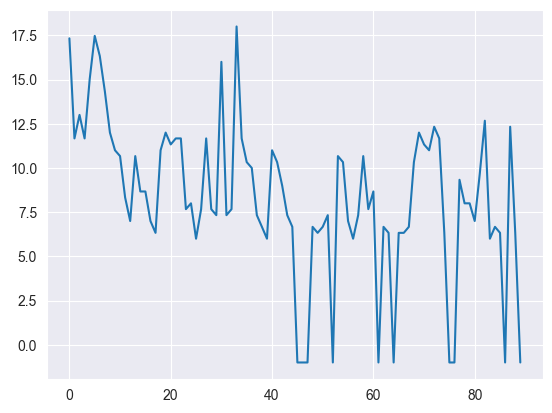

In [ ]:
time = [i for i in range(90)]
plt.plot(time, incubation_time, linestyle='-')
plt.show()